# Machine Learning: Lidiando con datos de muchas dimensiones

Cuando trabajamos con datos que contienen un gran número de dimensiones, es recomendable transformarlos para ajustarlos a un espacio de menor dimensionalidad, asegurándonos de preservar las características más importantes de los datos originales. Este proceso nos ayuda a:
- Facilita el análisis y la interpretación
- Mejora la velocidad del procesamiento  de datos
- Requiere  menos recursos computacionales
- Reduce el riesgo de sobreajuste y subajuste



##### Escenario: 
Estamos colaborando con un hospital que busca predecir si los tumores en pacientes ingresados son benignos o malignos, con el fin de actuar con mayor rapidez y salvar vidas. En este notebook, nuestro objetivo es entrenar un modelo de machine learning utilizando diversos tipos de exámenes de salud para predecir el tipo de tumor. Además, mostraremos distintas estrategias para manejar la alta dimensionalidad en el modelado de aprendizaje automático.

El dataset utilizado en este proyecto es un conjunto de datos ficticio llamado `data.csv`, adaptado a nuestro contexto. Se basa en el siguiente dataset de referencia:

*Dataset:* [Breast Cancer Wisconsin Data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

# 1. Análisis y Validación Inicial de Datos

*https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html*

## Análisis y Limpieza de los Datos

Primero, analizaremos la estructura de nuestra base de datos, examinando sus dimensiones y la distribución de los registros entre tumores benignos y malignos.

In [1]:
import pandas as pd

dataset = pd.read_csv('data.csv')
dataset.head(3)

,id,diagnostico,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,...,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32,examen_33
0,842302,M,17.99,10.38,122.8,103.78,1001.0,0.11840,0.27760,0.3001,...,184.6,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,103.78,1326.0,0.08474,0.07864,0.0869,...,158.8,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,103.78,1203.0,0.10960,0.15990,0.1974,...,152.5,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN


In [2]:
dataset.shape

(569, 35)

In [3]:
dataset.diagnostico.value_counts()

diagnostico
B    357
M    212
Name: count, dtype: int64

El siguiente paso es identificar la presencia de valores nulos o faltantes en nuestra base de datos, un aspecto crucial para garantizar la integridad y calidad del modelo. En caso de encontrar valores faltantes, tomaremos las medidas adecuadas, como eliminarlos si es necesario.

In [4]:
dataset.isna().sum()

id               0
diagnostico      0
examen_1         0
examen_2         0
examen_3         0
examen_4         0
examen_5         0
examen_6         0
examen_7         0
examen_8         0
examen_9         0
examen_10        0
examen_11        0
examen_12        0
examen_13        0
examen_14        0
examen_15        0
examen_16        0
examen_17        0
examen_18        0
examen_19        0
examen_20        0
examen_21        0
examen_22        0
examen_23        0
examen_24        0
examen_25        0
examen_26        0
examen_27        0
examen_28        0
examen_29        0
examen_30        0
examen_31        0
examen_32        0
examen_33      419
dtype: int64

Después de un análisis preliminar de los datos, hemos decidido eliminar las variables 'id' y 'examen 33'. Además, transformaremos la variable categórica 'Diagnóstico' en variables numéricas, asignando 1 a 'M' (maligno) y 0 a 'B' (benigno) para facilitar una mejor interpretación del modelo.

In [5]:
dataset.drop(columns= ['id', 'examen_33'], axis = 1, inplace=True)
dataset.diagnostico.replace('M',1, inplace=True)
dataset.diagnostico.replace('B',0, inplace=True)

In [6]:
dataset.head()

,diagnostico,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,examen_9,...,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32
0,1,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


## Segmentación de datos y Evaluación de Modelos Baseline

Una vez limpiados los datos, los dividiremos en conjuntos de entrenamiento y prueba. Comenzaremos entrenando un modelo de regresión logística. Luego, evaluaremos otros modelos, como Random Forest, y seleccionaremos el mejor como línea base para iniciar la reducción de la dimensionalidad de los datos.

1. Separación de Datos: Dividiremos los datos en características (x) y etiquetas (y), donde x contiene todas las columnas excepto la de diagnóstico, y y contiene la columna de diagnóstico.

2. Estandarización: Normalizaremos las características para que tengan una media de 0 y una desviación estándar de 1, utilizando StandardScaler. Esto asegura que todas las características tengan el mismo rango de valores.

3. División en Conjuntos de Entrenamiento y Prueba: Usaremos train_test_split para dividir los datos estandarizados en conjuntos de entrenamiento y prueba. Esto nos permitirá entrenar el modelo con una parte de los datos y evaluar su desempeño con otra parte que no ha sido vista durante el entrenamiento.
La división se hace con una proporción de 70% para entrenamiento y 30% para prueba, y se establece una semilla aleatoria (random_state=42) para asegurar que los resultados sean reproducibles.


In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


x = dataset.drop(columns = 'diagnostico', axis = 1)
x_std = StandardScaler().fit_transform(x)#Estandarizacion
y = dataset.diagnostico

x_train, x_test, y_train, y_test = train_test_split(x_std, y, random_state=42, test_size=0.3)

4. Entrenamiento del Modelo: Usaremos LogisticRegression de la biblioteca sklearn para entrenar un modelo de regresión logística. Configuraremos el parámetro C en 100 para controlar la regularización del modelo y n_jobs=-1 para usar todos los núcleos del procesador disponibles. Luego, ajustaremos el modelo a nuestros datos de entrenamiento (x_train y y_train).

In [8]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C=100, n_jobs=-1)
logistic.fit(x_train, y_train)

LogisticRegression(C=100, n_jobs=-1)

5. Evaluación y Ajuste del Modelo: Una vez entrenado el modelo, evaluaremos su desempeño utilizando el conjunto de prueba para medir su capacidad de generalización a datos nuevos. Además, ajustaremos algunos parámetros del modelo para investigar posibles mejoras en el rendimiento. Esto nos permitirá optimizar el modelo y lograr un mejor puntaje en nuestras métricas de evaluación.

In [9]:
logistic.score(x_test, y_test)

0.9590643274853801

In [10]:
logistic = LogisticRegression(C=1, n_jobs=-1)
logistic.fit(x_train, y_train)
logistic.score(x_test, y_test)

0.9824561403508771

6. Validación de la Línea Base: Ahora compararemos el desempeño de nuestro modelo con otros, como el RandomForestClassifier, para determinar cuál obtiene la mejor puntuación. Seleccionaremos el modelo con la mejor puntuación como nuestra línea base. Esta línea base nos permitirá comparar el rendimiento actual del modelo con el rendimiento futuro después de reducir la dimensionalidad de los datos.

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.9707602339181286

## Conclusión
Tomaremos como línea base al modelo LogisticRegression con una exactitud de 0.9824, en comparación con el modelo RandomForestClassifier, que obtuvo una exactitud de 0.9708. La regresión logística ha demostrado un mejor desempeño en esta etapa, por lo que usaremos este modelo como referencia para evaluar el impacto de la reducción de la dimensionalidad de los datos.

# 2. Avanzando y explorando los datos

*https://seaborn.pydata.org/introduction.html*

*https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html*

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
datos = pd.concat([y,x], axis = 1)
datos.head()

,diagnostico,examen_1,examen_2,examen_3,examen_4,examen_5,examen_6,examen_7,examen_8,examen_9,...,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_29,examen_30,examen_31,examen_32
0,1,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [14]:
datos = pd.melt(datos, id_vars = 'diagnostico', var_name='examenes', value_name='resultados')
datos.head()

,diagnostico,examenes,resultados
0,1,examen_1,17.99
1,1,examen_1,20.57
2,1,examen_1,19.69
3,1,examen_1,11.42
4,1,examen_1,20.29


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'examen_1'),
  Text(1, 0, 'examen_2'),
  Text(2, 0, 'examen_3'),
  Text(3, 0, 'examen_4'),
  Text(4, 0, 'examen_5'),
  Text(5, 0, 'examen_6'),
  Text(6, 0, 'examen_7'),
  Text(7, 0, 'examen_8'),
  Text(8, 0, 'examen_9'),
  Text(9, 0, 'examen_10'),
  Text(10, 0, 'examen_11'),
  Text(11, 0, 'examen_12'),
  Text(12, 0, 'examen_13'),
  Text(13, 0, 'examen_14'),
  Text(14, 0, 'examen_15'),
  Text(15, 0, 'examen_16'),
  Text(16, 0, 'examen_17'),
  Text(17, 0, 'examen_18'),
  Text(18, 0, 'examen_19'),
  Text(19, 0, 'examen_20'),
  Text(20, 0, 'examen_21'),
  Text(21, 0, 'examen_22'),
  Text(22, 0, 'examen_23'),
  Text(23, 0, 'examen_24'),
  Text(24, 0, 'examen_25'),
  Text(25, 0, 'examen_26'),
  Text(26, 0, 'examen_27'),
  Text(27, 0, 'examen_28'),
  Text(28, 0, 'examen_29'),
  Text(29, 0, 'examen_30'),
  Text(30, 0, 'examen_31'),
  Tex

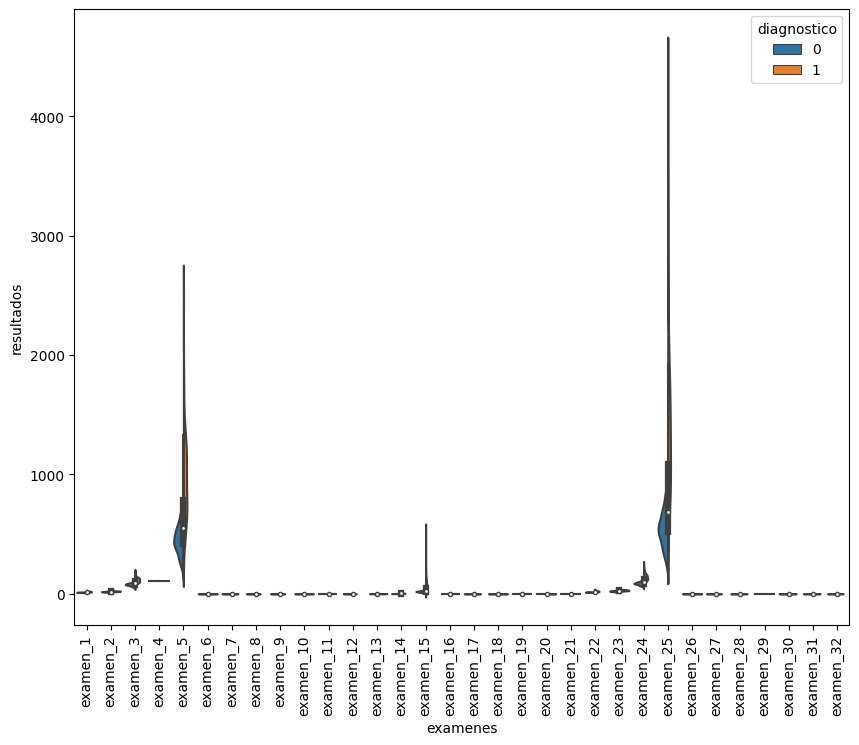

In [15]:
plt.figure(figsize=(10,8))
sns.violinplot(data = datos, x = 'examenes', y = 'resultados', hue = 'diagnostico', split=True)
plt.xticks(rotation = 90)

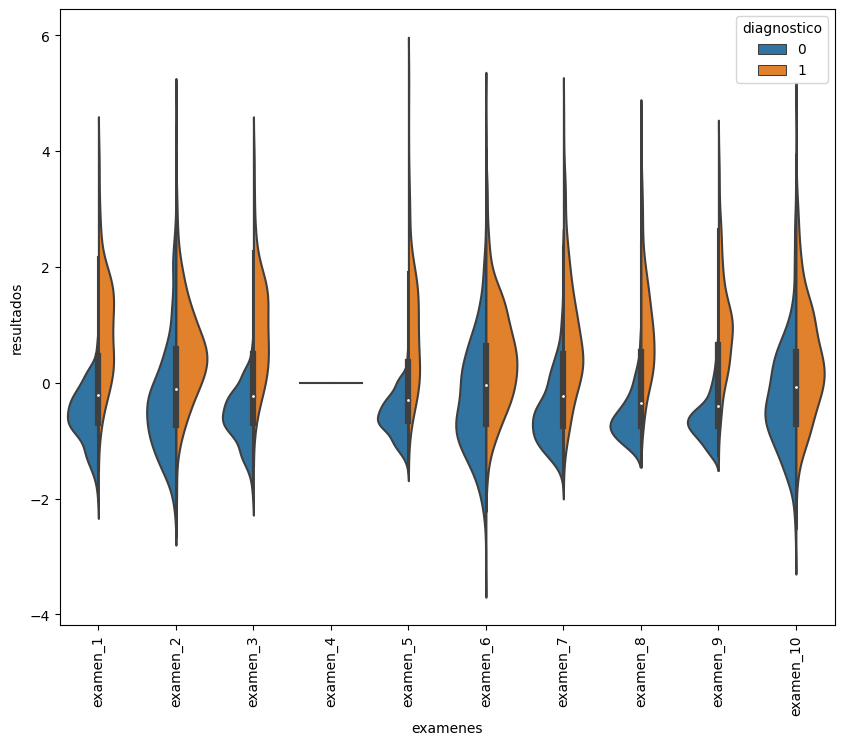

In [16]:
X1 = pd.DataFrame(x_std, columns = x.keys())

def violin(inicio, fin):
    datos = pd.concat([y,X1.iloc[:,inicio:fin]], axis = 1)
    datos = pd.melt(datos, id_vars = 'diagnostico', var_name='examenes', value_name='resultados')
    plt.figure(figsize=(10,8))
    sns.violinplot(data = datos, x = 'examenes', y = 'resultados', hue = 'diagnostico', split=True)
    plt.xticks(rotation = 90)

violin(0,10)


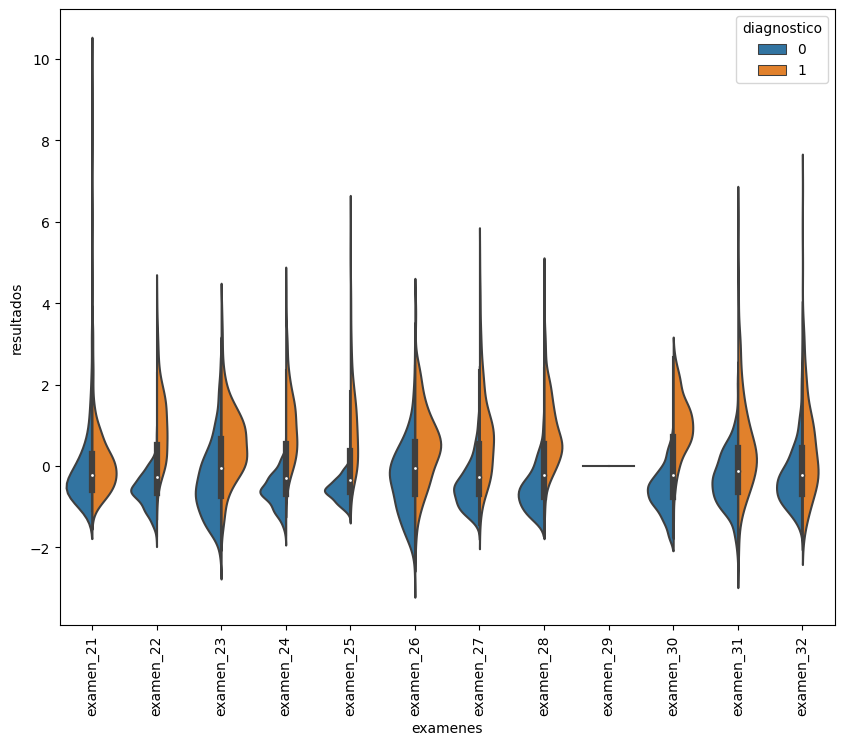

In [17]:
violin(20,32)

### Variables constantes

Cómo podemos observar las variables 4 y 29 son variables constantes.
Este tipo de variables no se deben tomar en cuenta porque no aportan información útil al modelo. Estas variables tienen el mismo valor en todos los registros, por lo que no ayudan a diferenciar ni a predecir las salidas, y pueden incluso aumentar la complejidad y el tiempo de entrenamiento innecesariamente.

In [18]:
X2 = X1.drop(columns = ["examen_29", "examen_4"], axis=1)
X2.head(2)

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,...,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [19]:
def puntaje(resultados):
    x_train, x_test,y_train, y_test = train_test_split(resultados, y, random_state=42, test_size=0.3)
    logistic = LogisticRegression(C=1, n_jobs=-1)
    logistic.fit(x_train, y_train)
    return f'La exactitud es: {round(logistic.score(x_test, y_test)*100,2)}%'

In [20]:
print(puntaje(X1))

La exactitud es: 98.25%


In [21]:
print(puntaje(X2))

La exactitud es: 98.25%


# 3. Datos correlacionados

Los datos correlacionados son aquellos en los que existe una relación estadística entre dos o más variables, de manera que el cambio en una variable tiende a estar asociado con un cambio en otra.

In [22]:
X2.corr()

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,...,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
examen_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
examen_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
examen_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
examen_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
examen_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
examen_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
examen_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
examen_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
examen_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
examen_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Para hacer mas amigable y más visual la tabla de correlación podemos usar un mapa de calor de Seaborn

<Axes: >

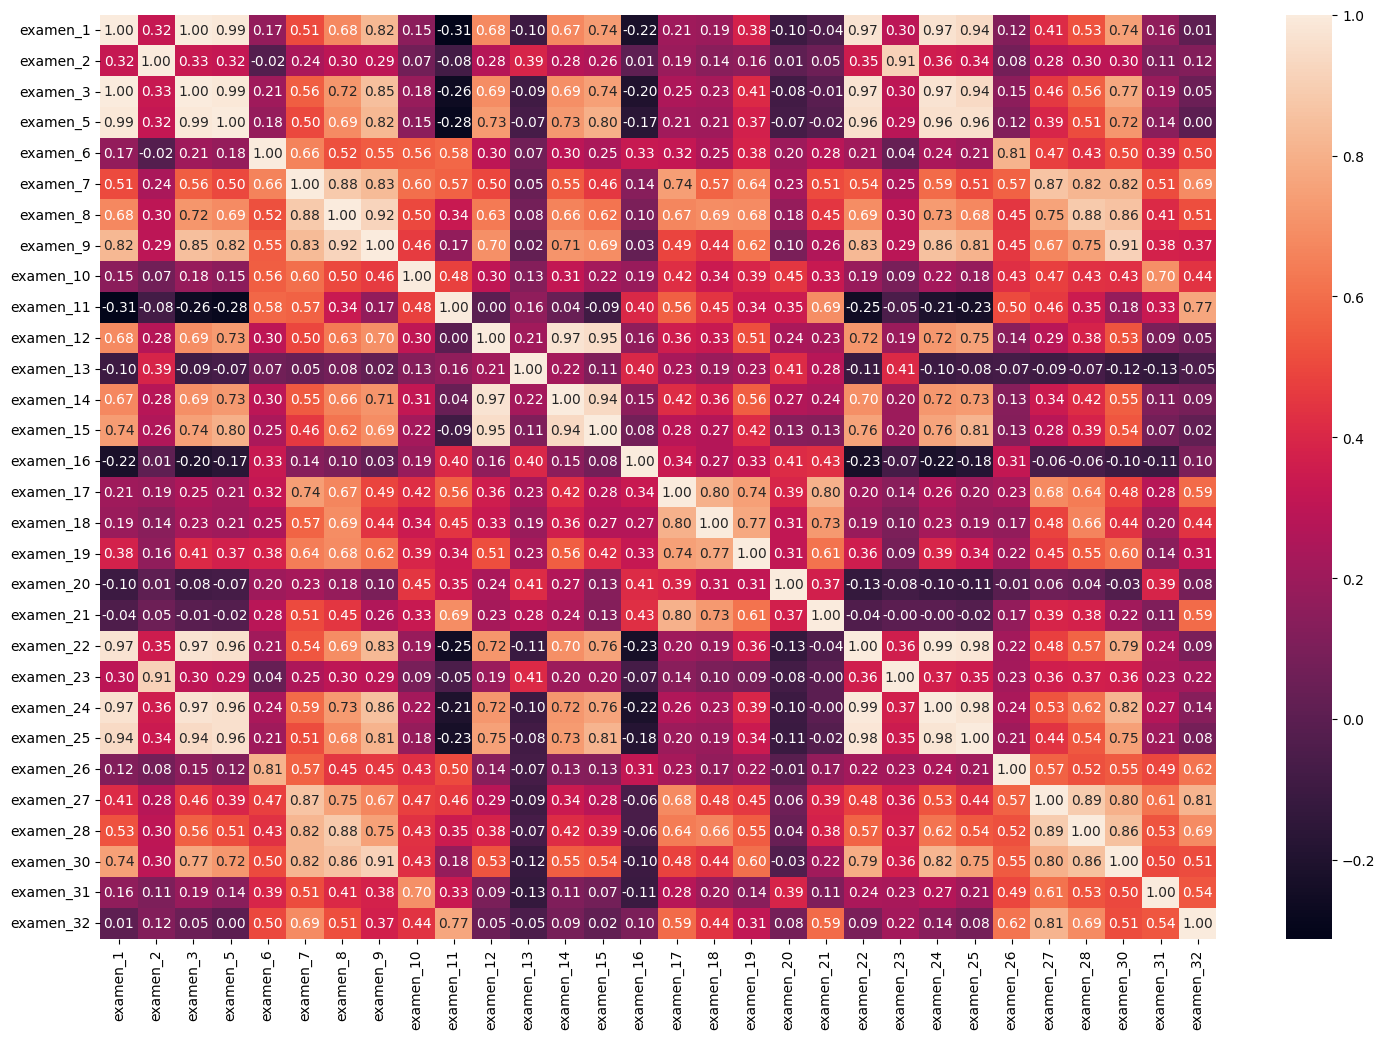

In [23]:
plt.figure(figsize=(18,12))
sns.heatmap(X2.corr(), annot=True, fmt = ".2f")

#### Valores altamante correlacionados

Con los valores altamente correlacionados, generalmente debemos eliminar uno de ellos del conjunto de datos para evitar la multicolinealidad, que puede afectar negativamente el rendimiento y la interpretación del modelo de Machine Learning.

In [24]:
alta_corr = X2.corr()[X2.corr()>0.99]
alta_corr

,examen_1,examen_2,examen_3,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,...,examen_22,examen_23,examen_24,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
examen_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
examen_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
alta_corr.sum()

examen_1     1.997855
examen_2     1.000000
examen_3     1.997855
examen_5     1.000000
examen_6     1.000000
examen_7     1.000000
examen_8     1.000000
examen_9     1.000000
examen_10    1.000000
examen_11    1.000000
examen_12    1.000000
examen_13    1.000000
examen_14    1.000000
examen_15    1.000000
examen_16    1.000000
examen_17    1.000000
examen_18    1.000000
examen_19    1.000000
examen_20    1.000000
examen_21    1.000000
examen_22    1.993708
examen_23    1.000000
examen_24    1.993708
examen_25    1.000000
examen_26    1.000000
examen_27    1.000000
examen_28    1.000000
examen_30    1.000000
examen_31    1.000000
examen_32    1.000000
dtype: float64

In [26]:
X3 = X2.drop(columns=['examen_3', 'examen_24'])
X3.head()

,examen_1,examen_2,examen_5,examen_6,examen_7,examen_8,examen_9,examen_10,examen_11,examen_12,...,examen_21,examen_22,examen_23,examen_25,examen_26,examen_27,examen_28,examen_30,examen_31,examen_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [27]:
puntaje(X3)

'La exactitud es: 98.25%'

Como se puede observar al eliminar las variables "examen_3" y "examen_24" le exactitud de nuestro modelo no presenta cambios. Esto debido a la alta correlación entre las variables.

# 4. Automatizando la selección de los datos

##### *https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html*

In [28]:
from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(score_func= chi2, k=5)

In [29]:
X4 = x.drop(columns=['examen_3','examen_4','examen_24','examen_29'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3, random_state=42)
kbest.fit(X_train, y_train)

SelectKBest(k=5, score_func=<function chi2 at 0x0000017D0F851760>)

In [30]:
kbest_train= kbest.transform(X_train)
kbest_test= kbest.transform(X_test)
logistic = LogisticRegression()
logistic.fit(kbest_train,y_train)

LogisticRegression()

In [31]:
print(f'La exactitud utilizando selectkbest es: {round(logistic.score(kbest_test,y_test)*100,2)}%')

La exactitud utilizando selectkbest es: 96.49%


### Matriz de Confusión

La matriz de confusión es una herramienta clave en el análisis de rendimiento de modelos de clasificación en Machine Learning. Se utiliza para evaluar la precisión de un modelo al comparar las predicciones del modelo con las etiquetas reales de los datos. 

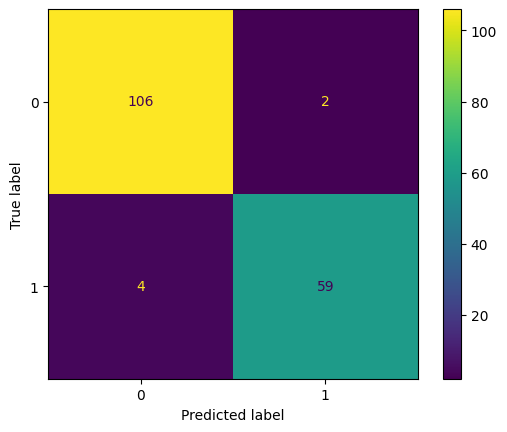

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logistic, kbest_test, y_test, values_format='d')

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def seleccion(train, test):
    model = logistic.fit(train, y_train)
    a = f'La tasa de acierto: {round(recall_score(y_test, model.predict(test))*100,2)}%'
    b = f'La precision: {round(precision_score(y_test, model.predict(test))*100,2)}%'
    c = f'El valor f es: {round(f1_score(y_test, model.predict(test))*100,2)}%'
    d = f'La exactitud es: {round(accuracy_score(y_test, model.predict(test))*100,2)}%'
    return f'{a}. {b}, {c}, {d}.'

seleccion(kbest_train, kbest_test)

'La tasa de acierto: 93.65%. La precision: 96.72%, El valor f es: 95.16%, La exactitud es: 96.49%.'

### Selección automatica de atributos

#### RFE

In [34]:
from sklearn.feature_selection import RFE

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
rfe = RFE(estimator = logistic, n_features_to_select=5, step = 1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [35]:
rfe_train = rfe.transform(X_train)
rfe_test = rfe.transform(X_test)

seleccion(rfe_train, rfe_test)

'La tasa de acierto: 96.83%. La precision: 95.31%, El valor f es: 96.06%, La exactitud es: 97.08%.'

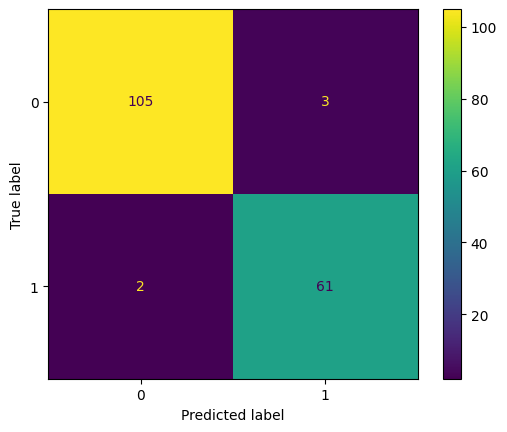

In [36]:
ConfusionMatrixDisplay.from_estimator(logistic, rfe_test, y_test, values_format = 'd')

In [37]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False])

In [38]:
X3.columns[rfe.support_]

Index(['examen_12', 'examen_22', 'examen_23', 'examen_25', 'examen_30'], dtype='object')

#### RFECV

RFECV Determina cuántos y cuáles son los mejores atributos que necesita para generar el mejor resultado.

In [39]:
from sklearn.feature_selection import RFECV

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
rfecv = RFECV(estimator = logistic, cv = 5, step = 1, scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=LogisticRegression(), scoring='accuracy')

In [40]:
rfecv_train = rfecv.transform(X_train)
rfecv_test = rfecv.transform(X_test)

seleccion(rfecv_train, rfecv_test)

'La tasa de acierto: 98.41%. La precision: 96.88%, El valor f es: 97.64%, La exactitud es: 98.25%.'

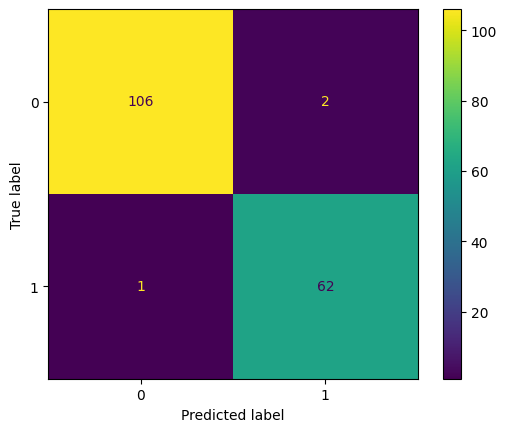

In [41]:
ConfusionMatrixDisplay.from_estimator(logistic, rfecv_test, y_test, values_format = 'd')


In [42]:
rfecv.support_

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False])

In [43]:
X3.columns[rfecv.support_]

Index(['examen_1', 'examen_2', 'examen_5', 'examen_7', 'examen_8', 'examen_9',
       'examen_10', 'examen_12', 'examen_13', 'examen_14', 'examen_15',
       'examen_17', 'examen_19', 'examen_20', 'examen_21', 'examen_22',
       'examen_23', 'examen_25', 'examen_26', 'examen_28', 'examen_30',
       'examen_31'],
      dtype='object')

In [44]:
len(X3.columns[rfecv.support_])

22

# 5. Visualizando los datos en el plano

*https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html*

*https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html*

In [45]:
rfecv.cv_results_['mean_test_score']

array([0.91199367, 0.92705696, 0.9396519 , 0.94718354, 0.95968354,
       0.96477848, 0.95977848, 0.95977848, 0.96227848, 0.96481013,
       0.96731013, 0.96724684, 0.96724684, 0.96724684, 0.96974684,
       0.96724684, 0.96724684, 0.96724684, 0.96977848, 0.97481013,
       0.97477848, 0.97731013, 0.97731013, 0.97731013, 0.97481013,
       0.97481013, 0.97481013, 0.97481013])

<function matplotlib.pyplot.show(close=None, block=None)>

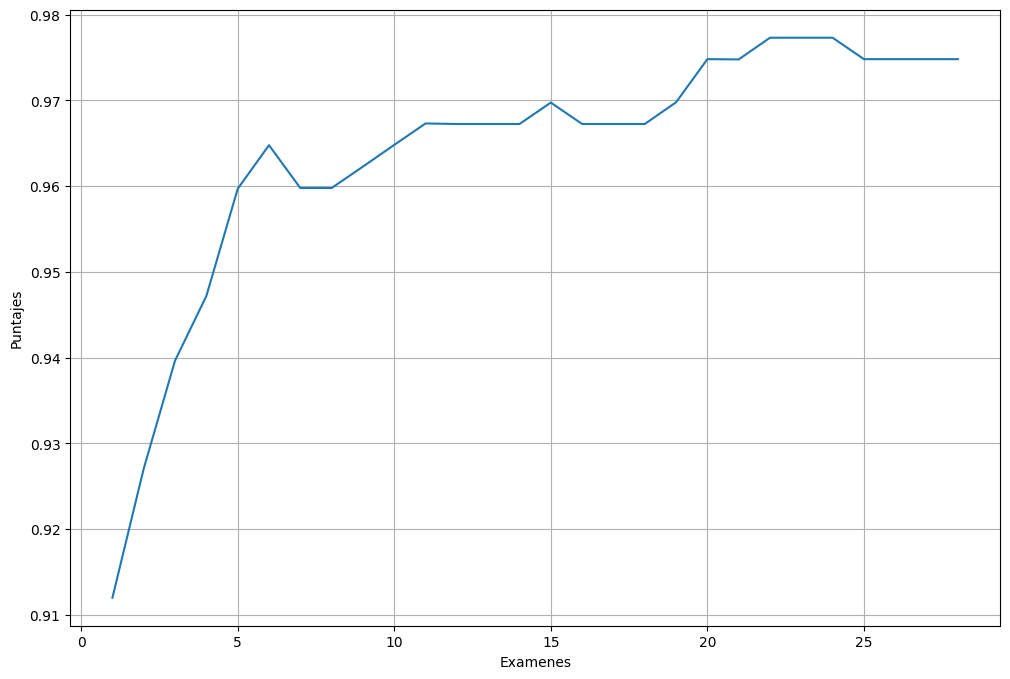

In [46]:
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(range(1,len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.xlabel('Examenes')
plt.ylabel('Puntajes')
plt.show

In [47]:
from sklearn.feature_selection import RFE

X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
rfe = RFE(estimator = logistic, n_features_to_select=2, step = 1)
rfe.fit(X_train, y_train)
rfe_train = rfe.transform(X_train)
rfe_test = rfe.transform(X_test)

seleccion(rfe_train, rfe_test)


'La tasa de acierto: 95.24%. La precision: 95.24%, El valor f es: 95.24%, La exactitud es: 96.49%.'

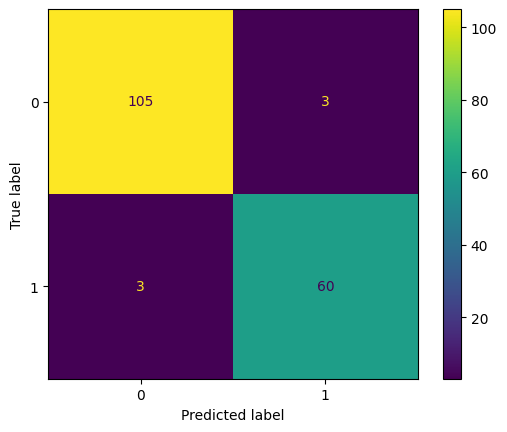

In [48]:
ConfusionMatrixDisplay.from_estimator(logistic, rfe_test, y_test, values_format = 'd')

In [49]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False])

In [50]:
X3.columns[rfe.support_]

Index(['examen_25', 'examen_30'], dtype='object')

In [51]:
X5 = X3[['examen_25', 'examen_30']]
X5.head()

,examen_25,examen_30
0,2.001237,2.296076
1,1.890489,1.087084
2,1.456285,1.955000
3,-0.550021,2.175786
4,1.220724,0.729259


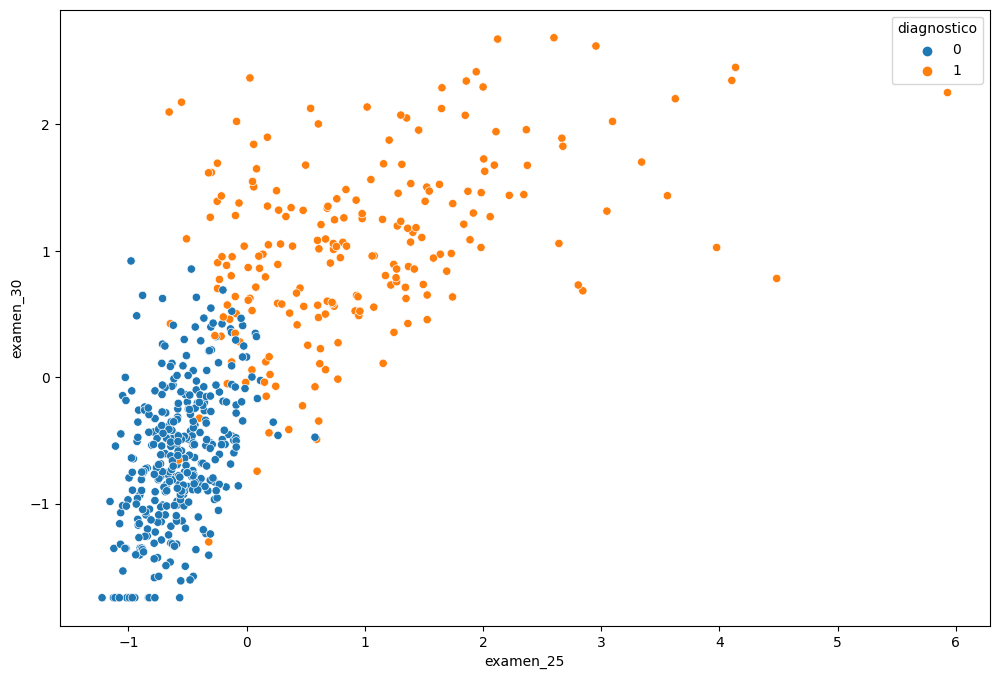

In [52]:
combined_df = pd.concat([X5, dataset['diagnostico']], axis=1)

plt.figure(figsize=(12,8))
sns.scatterplot(data=combined_df, x=X5.columns[0], y=X5.columns[1], hue='diagnostico')
plt.show()

### PCA


In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X6 = pca.fit_transform(X3)

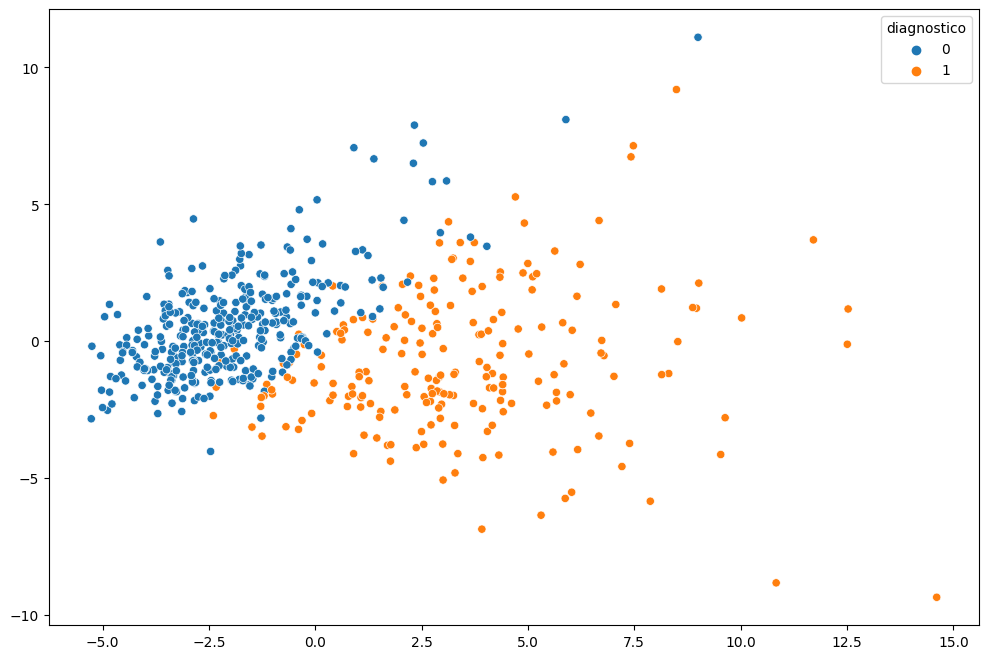

In [58]:

plt.figure(figsize=(12,8))
sns.scatterplot(x=X6[:, 0], y=X6[:, 1], hue='diagnostico', data=combined_df)
plt.show()

Quiero saber cuanta y qué información estoy sacrificando para ello:

In [59]:
pca.explained_variance_ratio_

array([0.42711576, 0.18232762])

In [60]:
pca.explained_variance_ratio_.sum()

0.609443379671151

Esto quiere decir que se ha perdido el 60% de la información, lo cual es mucho

### TSNE

In [63]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)

X7 = tsne.fit_transform(X3)


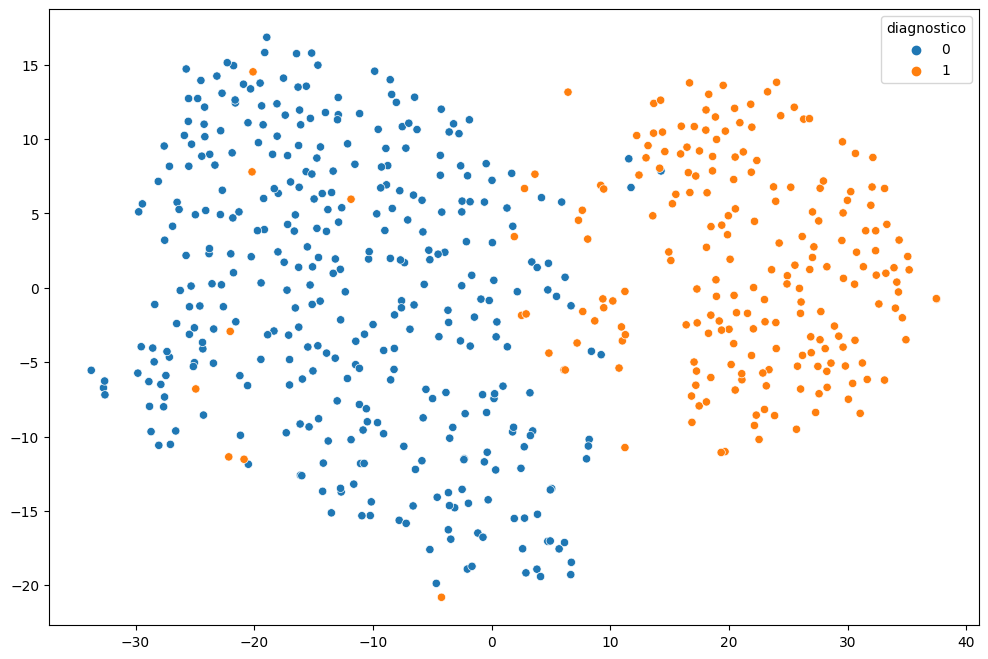

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=X7[:, 0], y=X7[:, 1], hue='diagnostico', data=combined_df)
plt.show()